# Topics covered in this notebook
## 1. Packages
## 2. Dataset - iris
## 3. Logistic Regression - Sigmoid Function
## 4. Functions needed for Logistic Regression
## 5. Model Fitting - Hand written Logistic Regression
## 6. Model Fitting - Sklearn package

# 1. Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# 2. Dataset - iris

In [2]:
iris = datasets.load_iris()

In [3]:
# See the default description in the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [5]:
# Split data into X (predictors) and Y (response)
# 4 predictors
X = iris.data
print(X.shape)

# Originally data contain three classes (0, 1, 2)
# For logistic regression purpose, changed classes into 0, 1
y = (iris.target != 0) * 1
print(y.shape)

(150, 4)
(150,)


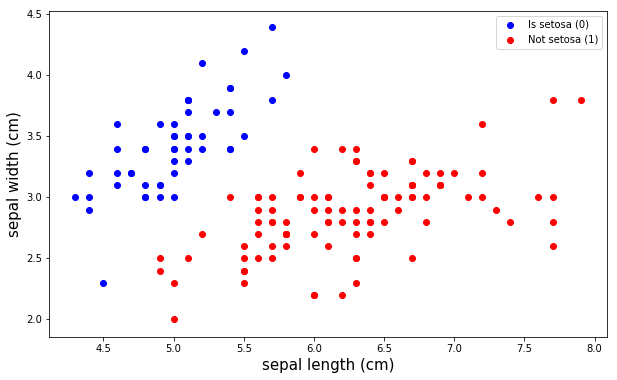

In [6]:
# Visualization: scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.xlabel(iris.feature_names[0], fontsize=15)
plt.ylabel(iris.feature_names[1], fontsize=15)
plt.legend(['Is setosa (0)', 'Not setosa (1)'])

# 3. Logistic Regression - Sigmoid Function
- **A sigmoid function takes inputs ranged from infinite negative to positive and returns outputs ranged from 0 to 1. Outputs are probabilities of success. Correspondingly, the probability of failure is 1 - probability of success.**

$$ h_\theta(x) = g(\theta^Tx) $$

$$ z = \theta^Tx $$

$$ g(z) = \frac {1} {1+\exp^{-z}} $$

In [7]:
sigmoid_output = []
x_input = []
for i in range(-20,20):
    sigmoid_output.append(1 / (1 + np.exp(-i)))
    x_input.append(i)

In [8]:
min(sigmoid_output), max(sigmoid_output)

(2.0611536181902037e-09, 0.9999999943972036)

Text(0.5, 1.0, 'sigmoid function')

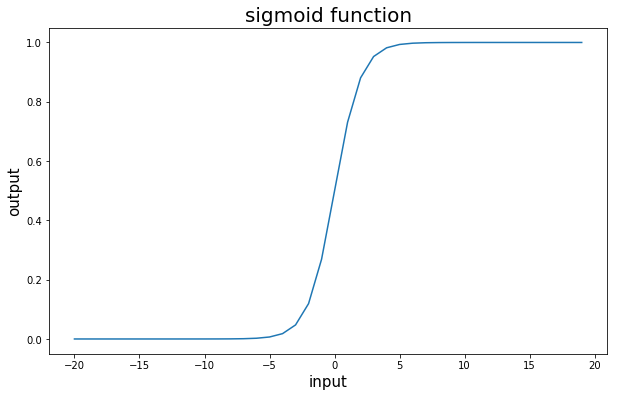

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, sigmoid_output)
plt.xlabel('input', fontsize=15)
plt.ylabel('output', fontsize=15)
plt.title('sigmoid function', fontsize=20)

# 4. Functions needed for Logistic Regression

- **Loss function of Logistic Regression**

$$ J(\theta) = \frac{1}{m} \sum_i^m -y_i ln(h_\theta(x_i)) - (1-y_i) ln(1-h_\theta(x_i))$$

- **Gradient Descent**

$$ \frac {\partial J(\theta)} {\partial \theta_j} = \frac{1}{m} \sum_i^m  x_i(h_\theta(x_i) - y_i) $$

In [10]:
class LogisticRegression:
    # Model initation: learning rate and iterations are needed for gradient descent optimization
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    # Add a biased term (beta 0) for X
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        # Concatenate arrays by columns
        return np.concatenate((intercept, X), axis=1)
    
    # Sigmoid function (return the probability of success from 0 to 1)
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Loss function as illustrated above
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # Logistic Regression Fitting
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # Weights initialization
        self.theta = np.zeros(X.shape[1])
        
        # Optimization: Gradient Descent
        for i in range(self.num_iter):
            # h is the prediction from sigmoid transformation
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            # Update theta
            self.theta -= self.lr * gradient
            # Given a new set of thetas, compute the corresponding loss
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
            # Display the loss information
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
                
    # Probability Prediction 
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

# 5. Model Fitting - Hand written Logistic Regression

In [11]:
model = LogisticRegression(lr=0.1, num_iter=300000, verbose=True)
%time model.fit(X, y)

loss: 0.5518148780651356 	
loss: 0.0009260487284893174 	
loss: 0.0004964360803264601 	
loss: 0.00034433226750420003 	
loss: 0.00026543657803717035 	
loss: 0.000216826367785434 	
loss: 0.0001837400049202278 	
loss: 0.00015970148734077025 	
loss: 0.0001414114307579239 	
loss: 0.00012700778779256526 	
loss: 0.00011535810515011869 	
loss: 0.0001057331193741963 	
loss: 9.76414839212886e-05 	
loss: 9.073977755222316e-05 	
loss: 8.478056320217928e-05 	
loss: 7.95809390840595e-05 	
loss: 7.500271919985764e-05 	
loss: 7.093951044517733e-05 	
loss: 6.730803600746006e-05 	
loss: 6.404215936840872e-05 	
loss: 6.108867514137177e-05 	
loss: 5.840428499476615e-05 	
loss: 5.595338623320507e-05 	
loss: 5.370642877297961e-05 	
loss: 5.163867679859466e-05 	
loss: 4.97292632110436e-05 	
loss: 4.796045903210829e-05 	
loss: 4.631710274052459e-05 	
loss: 4.4786150064451636e-05 	
loss: 4.3356315524772443e-05 	
CPU times: user 13.8 s, sys: 194 ms, total: 14 s
Wall time: 14.3 s


In [12]:
# Coefficient estimation
print('Beta 0: {}.'.format(model.theta[0]))
print('Beta 1 to Beta 4: {}.'.format(model.theta[1:]))

Beta 0: -0.796874346114306.
Beta 1 to Beta 4: [-1.29314673 -4.38930778  6.96197446  3.35690585].


In [13]:
preds = model.predict(X)
preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
print('Accuracy of prediction is: {}.'.format(sum(preds == y) / len(y)))

Accuracy of prediction is: 1.0.


# 6. Model Fitting - Sklearn package

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
sk_model = LogisticRegression()
%time sk_model.fit(X, y)

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 219 ms, sys: 38.9 ms, total: 258 ms
Wall time: 335 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
# Predictions
preds = sk_model.predict(X)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# Coefficient estimation
print('Beta 0: {}.'.format(sk_model.intercept_[0]))
print('Beta 1 to Beta 4: {}.'.format(sk_model.coef_[0]))

Beta 0: -0.26421852991732503.
Beta 1 to Beta 4: [-0.41021713 -1.46416217  2.26003266  1.02103509].


In [19]:
# Accuracy: number of correctly predicted class / number of all class 
print('Accuracy of prediction is: {}.'.format(sum(preds == y) / len(y)))

Accuracy of prediction is: 1.0.
